# Question 1

In [116]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

Text(0.5,1,'Data')

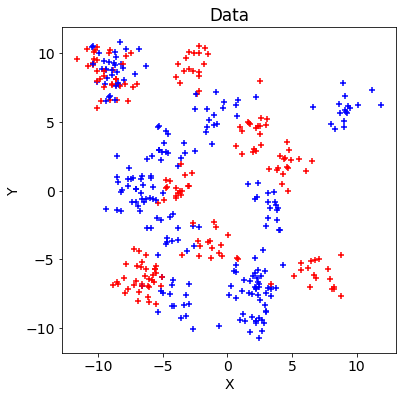

In [133]:
#plot dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], marker='+', c=y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data")

['Performance on testing set:', 0.835]
['Performance on training set:', 1.0]


Text(0,0.5,'y')

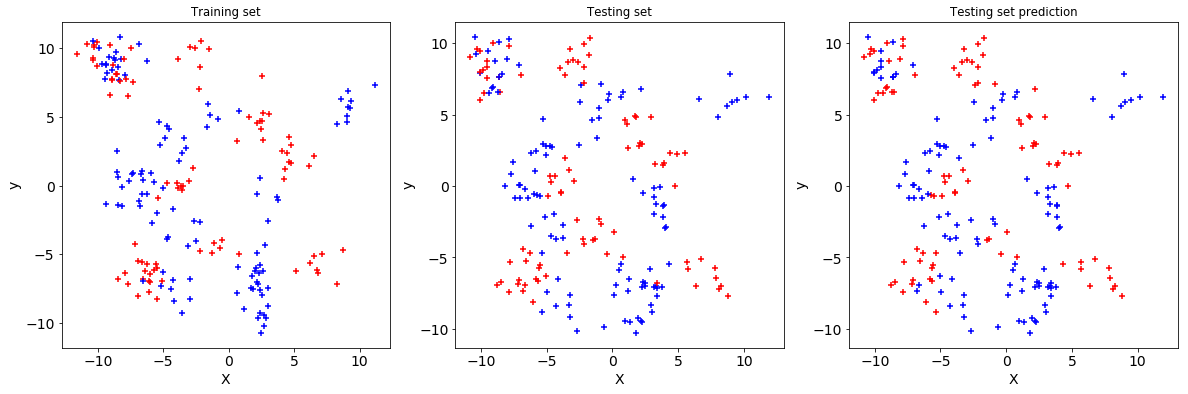

In [150]:
#split dataset into training and testing dataset
#take last 200 points as testing set: 50%
Xtrain=X[:200] #training set
ytrain=y[:200]
Xtest=X[200:] #testing set
ytest=y[200:]


clf = KNeighborsClassifier(n_neighbors=1,algorithm='brute')
clf.fit(Xtrain, ytrain)
ytest_fit=clf.predict(Xtest)
print(['Performance on testing set:' ,clf.score(Xtest, ytest)])
print(["Performance on training set:" ,clf.score(Xtrain, ytrain)])

#plot training and testing sets
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.title("Training set", fontsize='small')
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker='+', c=ytrain)
plt.xlabel("X")
plt.ylabel("y")

plt.subplot(132)
plt.title("Testing set", fontsize='small')
plt.scatter(Xtest[:, 0], Xtest[:, 1], marker='+', c=ytest)
plt.xlabel("X")
plt.ylabel("y")
plt.subplot(133)
plt.title("Testing set prediction", fontsize='small')
plt.scatter(Xtest[:, 0], Xtest[:, 1], marker='+', c=ytest_fit)
plt.xlabel("X")
plt.ylabel("y")


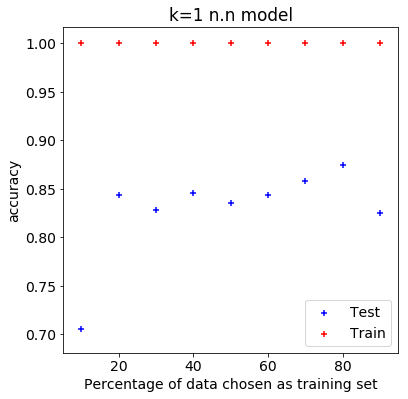

In [151]:
#Consider different splittings between training and testing data (10/90, 20/80, ..., 90/10) and compare performance
perfTest=[] 
perfTrain=[]
Mixing=[]
n = 40
while (n < 400):
    XTrain=X[:n]
    yTrain=y[:n]
    XTest=X[n:]
    yTest=y[n:]

    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(XTrain, yTrain)
#ytest_fit=clf.predict(Xtest)
    perfTrain.append(clf.score(XTrain,yTrain))
    perfTest.append(clf.score(XTest,yTest))
    Mixing.append(n/4)
    n = n + 40


plt.figure(figsize=(6, 6))
plt.scatter(Mixing, perfTest,label='Test', marker='+', c='b')
plt.scatter(Mixing, perfTrain, label='Train', marker='+', c='r')
plt.xlabel('Percentage of data chosen as training set')
plt.ylabel('accuracy')
plt.title('k=1 n.n model')
plt.legend()

As discussed before, the accuracy of the k=1 model is 1 by construction. 

For the testing data , we see that the accuracy increases steeply between 10% and 20%, and then keeps increasing until 80%. It is clear that the larger number of points in the training data, the more precise is the model, in that the probability that a point find its "true" nearest neighbour becomes larger. When 10% or less of data is used as training set, the density of point in the x-y plane is too small. 

We see that for a 90/10 splitting, the accuracy decreases. This is probably due to the fact that the testing set contains then only 40 points so that the statistics becomes less good.

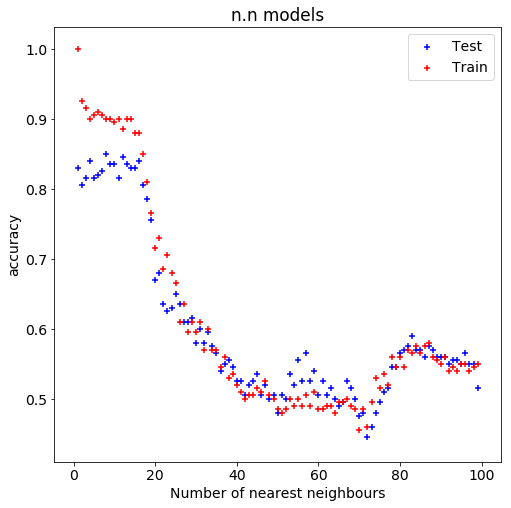

In [176]:
#compare the accuracy of models with different numbers of nn neighbours
XTrain=X[200:]
yTrain=y[200:]
XTest=X[:200]
yTest=y[:200]
perfTest=[]
perfTrain=[]
model=[]
n = 1
while (n < 100):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(XTrain, yTrain)
#ytest_fit=clf.predict(Xtest)
    perfTrain.append(clf.score(XTrain,yTrain))
    perfTest.append(clf.score(XTest,yTest))
    model.append(n)
    n = n + 1


plt.figure(figsize=(8, 8))
plt.scatter(model, perfTest,label='Test', marker='+', c='b')
plt.scatter(model, perfTrain, label='Train', marker='+', c='r')
plt.xlabel('Number of nearest neighbours')
plt.ylabel('accuracy')
plt.title('n.n models')
plt.legend()

For small k (k<15), the performance on the testing and training sets differ by roughly a constant term. The large accuracy on the testing data is biased (overfitting). This is due to the fact that at k=1 the accuracy on the training set is 1.0 by construction. For larger k, the performance of the model decreases and there is no longer any qualitative difference between the two data sets. 

The KNeighbor Classifier with k=4 is more complicated than with k=10. Indeed, the complexity of the classifier decreases with the number of neighbours. This can be understood by considering the limiting case where k=# of data points. In that case, the complexity is the lowest as only two possibility exist : either all the points are red or all the points are blue. 

The best settings for this data are for small (<15) k, where the accuracy is maximum. The maximum accuracy for the testing data is achieved for k=8. The choice k=1 is the simplest but could result in overfitting and leads to a higher sensitivity to noise. A good balance would be to take k=15: the performance on the testing set is nearly maximal and overfitting is reduced.

# Question 2

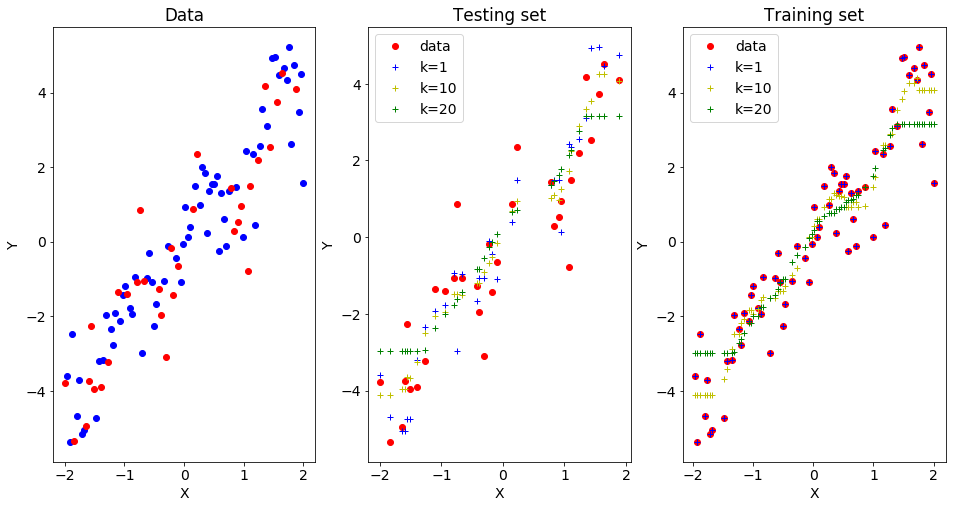

In [203]:
from sklearn.model_selection import train_test_split
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

[X, y] = make_regression()
#Split the data 2/3/1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Try and compare k=1, k=10, k=20
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, y_train) 
y_test_fit=neigh.predict(X_test)
y_train_fit=neigh.predict(X_train)

neigh10 = KNeighborsRegressor(n_neighbors=10)
neigh10.fit(X_train, y_train) 
y_test_fit10=neigh10.predict(X_test)
y_train_fit10=neigh10.predict(X_train)

neigh20 = KNeighborsRegressor(n_neighbors=20)
neigh20.fit(X_train, y_train) 
y_test_fit20=neigh20.predict(X_test)
y_train_fit20=neigh20.predict(X_train)

plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.plot(X_train, y_train, 'bo', X_test, y_test, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Data")

plt.subplot(132)
plt.plot(X_test, y_test, 'ro', X_test, y_test_fit, 'b+', X_test, y_test_fit10, 'y+', X_test, y_test_fit20, 'g+')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Testing set')
plt.legend(['data', 'k=1', 'k=10', 'k=20'])

plt.subplot(133)
plt.plot(X_train, y_train, 'ro', X_train, y_train_fit, 'b+',  X_train, y_train_fit10, 'y+', X_train, y_train_fit20, 'g+')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training set')
plt.legend(['data', 'k=1', 'k=10', 'k=20'])



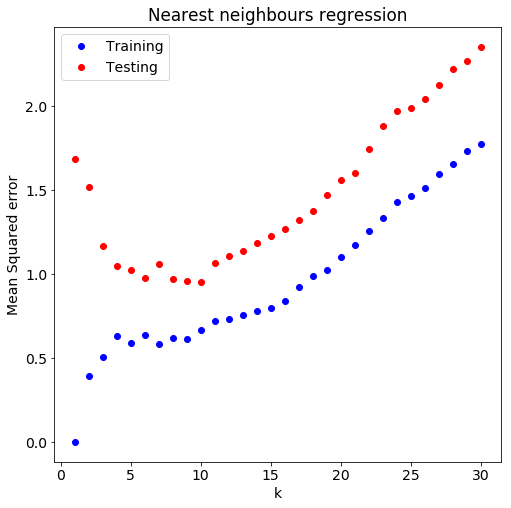

In [204]:
#compute mean square error on training and testing data for different k's
from sklearn.metrics import mean_squared_error
#print(mean_squared_error(y_train, y_train_fit))
TrainError=[]
TestError=[]
samples=[]
k=1
while k<=30 :
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train) 
    y_test_fit=neigh.predict(X_test)
    y_train_fit=neigh.predict(X_train)
    err_test=mean_squared_error(y_test,y_test_fit)
    err_train=mean_squared_error(y_train, y_train_fit)
    TrainError.append(err_train)
    TestError.append(err_test)
    samples.append(k)
    k=k+1

plt.figure(figsize=(8, 8))
plt.plot(samples, TrainError, 'bo', samples, TestError, 'ro')
plt.xlabel('k')
plt.ylabel('Mean Squared error')
plt.title('Nearest neighbours regression')
plt.legend(['Training', 'Testing'])



For small k (<5), the behaviour of the testing and training sets are qualitatively different. For the training set, the error increases with k : this is, as in the nn-classifier case, due to overfitting at small k. For the testing set, the error decreases between k=1 and k=5. This is because that the assumption made for k=1 (i.e. the data is locally constant) is not good for this data (because of the noise).

For large k, the regressor is biased towards globally constant functions. We see that the error increases (because our data grows linearly), for both data sets. The two sets differ roughly by one constant.

Th plateau between k=5 and k=15 corresponds to the optimal range of parameters, that is the error is minimal but without overfitting. The value of the plateau is related to the amount of noise (i.e. it is roughly equal to noise_level^2). 

The best setting is close to k=10, as the error on the testing data is minimum and therefore the predictivity is maximal.

# Q3

Text(0.5,1,'Data')

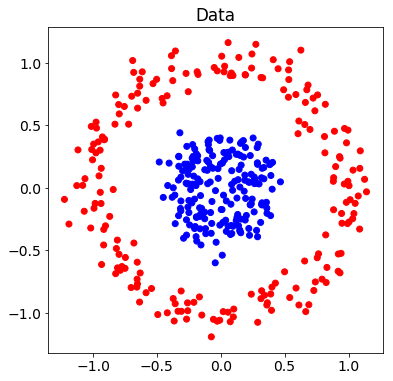

In [193]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c=y[:])
plt.title('Data')



Text(0.5,1,'Performance of different models')

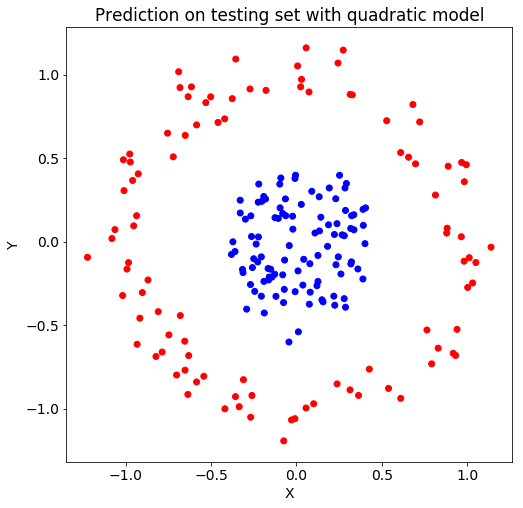

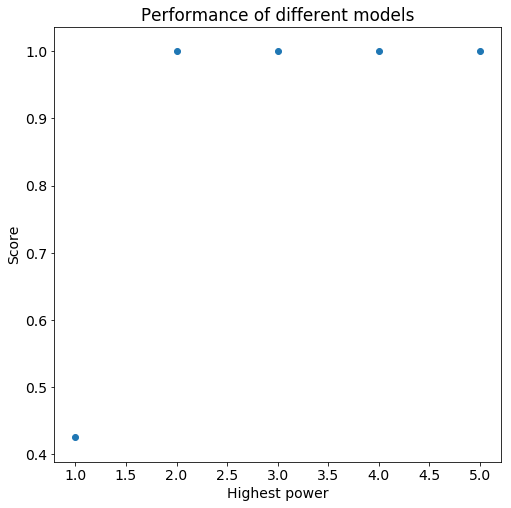

In [196]:
from sklearn.linear_model import LogisticRegression
#Split the data two halfs.
X_train=X[:200]
y_train=y[:200]
X_test=X[200:]
y_test=y[200:]
X_train_square=np.multiply(X_train,X_train)
X_test_square=np.multiply(X_test, X_test)

#y_test_fit=log(X_test)
#log = LogisticRegression().fit(np.concatenate((X_train,X_train_square),axis=1), y_train)
log=LogisticRegression().fit(X_train_square, y_train) #Use x^2 and y^2 because we deal with a circle
#y_test_fit=log.predict(np.concatenate((X_test,X_test_square),axis=1))
y_test_fit=log.predict(X_test_square)
y_train_fit=log.predict(X_train_square)

plt.figure(figsize=(8, 8))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_fit)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction on testing set with quadratic model')


count=1
Perf_complexity=[]
A_train=X_train
B_train=A_train
A_test=X_test
B_test=A_test
powers=[1]
log=LogisticRegression().fit(A_train,y_train)
score_tmp=log.score(A_test,y_test)
Perf_complexity.append(score_tmp)

while count <=4 :
        B_train=np.multiply(X_train,B_train)
        A_train=np.concatenate((A_train, B_train),axis=1)
        B_test=np.multiply(X_test,B_test)
        A_test=np.concatenate((A_test, B_test),axis=1)
        log=LogisticRegression().fit(A_train,y_train)
        score_tmp=log.score(A_test,y_test)
        Perf_complexity.append(score_tmp)
        
        count= count+1
        powers.append(count)
        
plt.figure(figsize=(8,8))
plt.scatter(powers, Perf_complexity)
plt.xlabel('Highest power')
plt.ylabel('Score')
plt.title('Performance of different models')

Because the boundary between the red and blue region should be a circle, the logistic function should depend on the square of the coordinates X^2 and y^2. We can increase the complexity of the model by fitting to a function that depends on X, Y, X^2, Y^2, X^3, and so on. We could also allow for cross terms like X*Y. 

We see that the model with only X and Y does not work, for obvious reasons. The simplest model with X^2 and Y^2 works perfectly well and there is no need to increase the complexity for this data.